# Data Loading

In [1]:
import re
import pandas as pd

# Load comments data
comments_df = pd.read_csv('GTA6_Trailer.csv')
comments_df.head()

,commentId,videoId,publishedAt,updatedAt,likeCount,textDisplay,totalReplyCount,parentId
0,UgxBtyYHm6cOx5dHcMV4AaABAg,QdBZY2fkU-0,2024-08-01T16:47:52Z,2024-08-01T16:47:52Z,1,We got GTA VI trailer before GTA VI 🔥🔥🗣🗣,0,NaN
1,UgzoF5M_W25ZkzYnG694AaABAg,QdBZY2fkU-0,2024-08-01T16:39:07Z,2024-08-01T16:39:07Z,0,What is this forespoken 2,1,NaN
2,UgzoF5M_W25ZkzYnG694AaABAg.A6b6-zhl0LhA6b7f-Cxvan,QdBZY2fkU-0,2024-08-01T16:53:36Z,2024-08-01T16:53:36Z,0,ku,0,UgzoF5M_W25ZkzYnG694AaABAg
3,Ugwuy8J9HCo-hAUhkVR4AaABAg,QdBZY2fkU-0,2024-08-01T16:32:41Z,2024-08-01T16:32:41Z,0,"no, youre not the only one checking up on this...",0,NaN
4,UgxDN_wD-lVLyvRONAd4AaABAg,QdBZY2fkU-0,2024-08-01T16:14:40Z,2024-08-01T16:14:40Z,1,It's More Realistic Game,0,NaN


In [2]:
Text1 = comments_df['textDisplay']
Text1.head()

0             We got GTA VI trailer before GTA VI 🔥🔥🗣🗣
1                            What is this forespoken 2
2                                                   ku
3    no, youre not the only one checking up on this...
4                             It's More Realistic Game
Name: textDisplay, dtype: object

# Text PreProcessing

In [3]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    text = ' '.join(tokens)
    return text

Text1 = comments_df['textDisplay'].fillna("")
Text1_preprocessed = Text1.apply(preprocess_text)
print(Text1_preprocessed.head())

0     got gta vi trailer gta vi
1                    forespoken
2                            ku
3    youre one checking trailer
4                realistic game
Name: textDisplay, dtype: object


# Classify sentiment

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
        
def classify_sentiment_custom(text):
    #VADER score
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiment_labels_custom = Text1_preprocessed.apply(classify_sentiment_custom)

result_df = pd.DataFrame({'original_text': Text1, 'preprocessed_text': Text1_preprocessed, 'sentiment': sentiment_labels_custom})
print(result_df.head(10))
#result_df.to_csv('Sentiment.csv')


                                       original_text  \
0           We got GTA VI trailer before GTA VI 🔥🔥🗣🗣   
1                          What is this forespoken 2   
2                                                 ku   
3  no, youre not the only one checking up on this...   
4                           It's More Realistic Game   
5       7 months omgg!!  so close sooo close!!!!!!!!   
6            plays in “music sounds better with you”   
7          This song cringey i fukin hate it so much   
8                                         Who asked?   
9             The wait is getting shorter day by day   

              preprocessed_text sentiment  
0     got gta vi trailer gta vi   neutral  
1                    forespoken   neutral  
2                            ku   neutral  
3    youre one checking trailer   neutral  
4                realistic game   neutral  
5   month omgg close sooo close   neutral  
6       play music sound better  positive  
7  song cringey fukin hate much

# Word Cloud classification

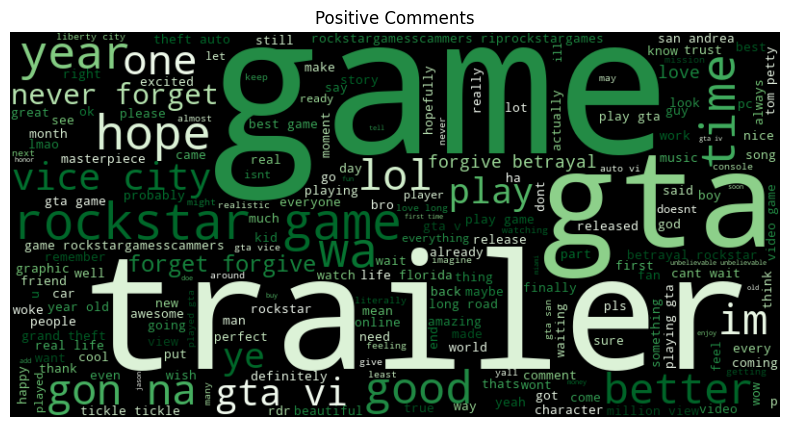

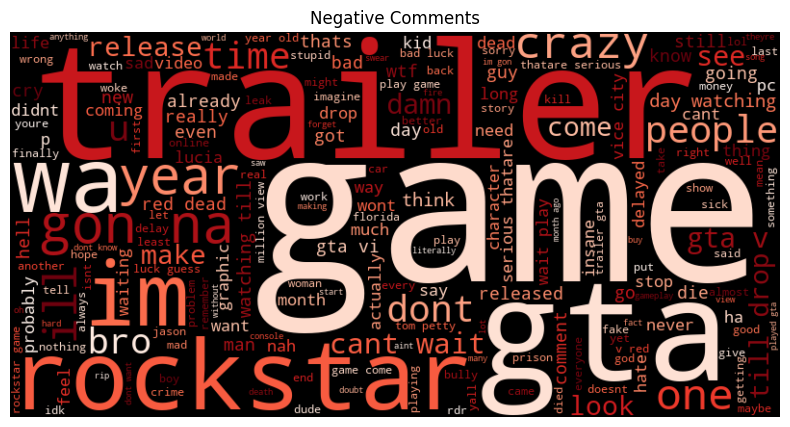

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = ' '.join(result_df[result_df['sentiment'] == 'positive']['preprocessed_text'])
negative_comments = ' '.join(result_df[result_df['sentiment'] == 'negative']['preprocessed_text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_comments)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Comments')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Comments')
plt.axis('off')
plt.show()


# Sentiment of Comments and comment replies 

Main Comments with Sentiments:
                                         textDisplay  \
0           We got GTA VI trailer before GTA VI 🔥🔥🗣🗣   
1                          What is this forespoken 2   
3  no, youre not the only one checking up on this...   
4                           It's More Realistic Game   
5       7 months omgg!!  so close sooo close!!!!!!!!   

             preprocessed_text sentiment  
0    got gta vi trailer gta vi   neutral  
1                   forespoken   neutral  
3   youre one checking trailer   neutral  
4               realistic game   neutral  
5  month omgg close sooo close   neutral  

Replies with Sentiments:
                              textDisplay           preprocessed_text  \
2                                      ku                          ku   
8                              Who asked?                       asked   
23                                     7*                               
24  Nice try to get liked u son of b....😂  nice try get 

C:\Users\hp\AppData\Local\Temp\ipykernel_6540\56220868.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=main_comments, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_6540\56220868.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=replies, palette='magma')


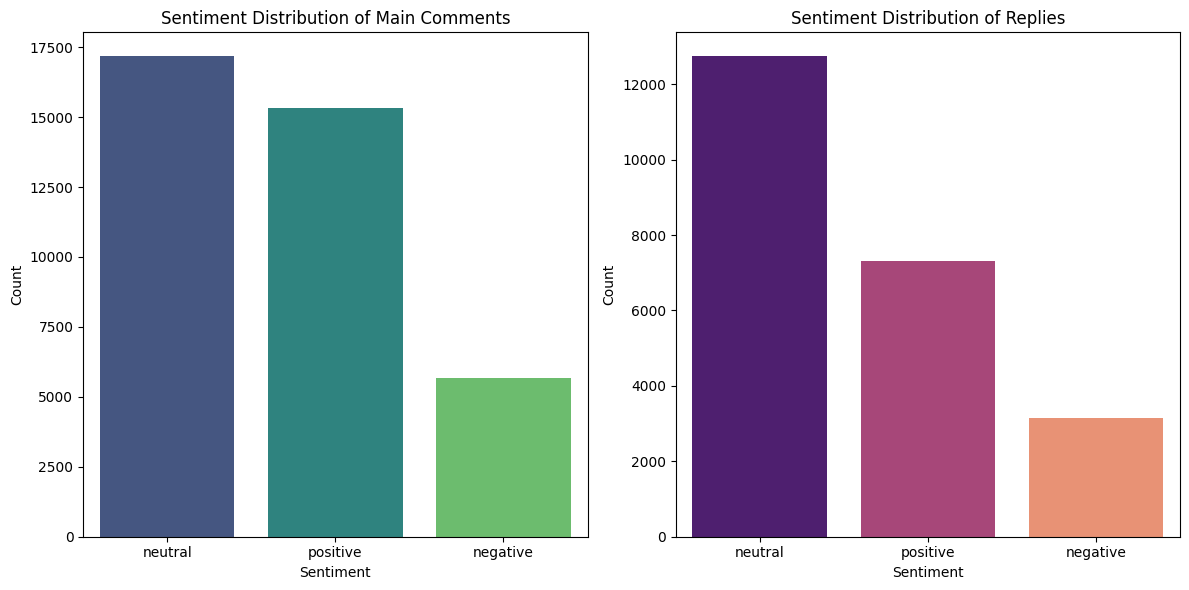

In [6]:
import seaborn as sns
comments_df['textDisplay'] = comments_df['textDisplay'].fillna("").astype(str)

main_comments = comments_df[comments_df['parentId'].isna()].copy()
replies = comments_df[comments_df['parentId'].notna()].copy()

main_comments.loc[:, 'preprocessed_text'] = main_comments['textDisplay'].apply(preprocess_text)
replies.loc[:, 'preprocessed_text'] = replies['textDisplay'].apply(preprocess_text)

main_comments.loc[:, 'sentiment'] = main_comments['preprocessed_text'].apply(classify_sentiment_custom)
replies.loc[:, 'sentiment'] = replies['preprocessed_text'].apply(classify_sentiment_custom)

print("Main Comments with Sentiments:")
print(main_comments[['textDisplay', 'preprocessed_text', 'sentiment']].head())
print("\nReplies with Sentiments:")
print(replies[['textDisplay', 'preprocessed_text', 'sentiment']].head())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=main_comments, palette='viridis')
plt.title('Sentiment Distribution of Main Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='sentiment', data=replies, palette='magma')
plt.title('Sentiment Distribution of Replies')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# ReplyCount and LikeCount LR

                            OLS Regression Results                            
Dep. Variable:              likeCount   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 6.535e+04
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:37:57   Log-Likelihood:            -3.8076e+05
No. Observations:               61385   AIC:                         7.615e+05
Df Residuals:                   61383   BIC:                         7.615e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -20.6499      0.495    -

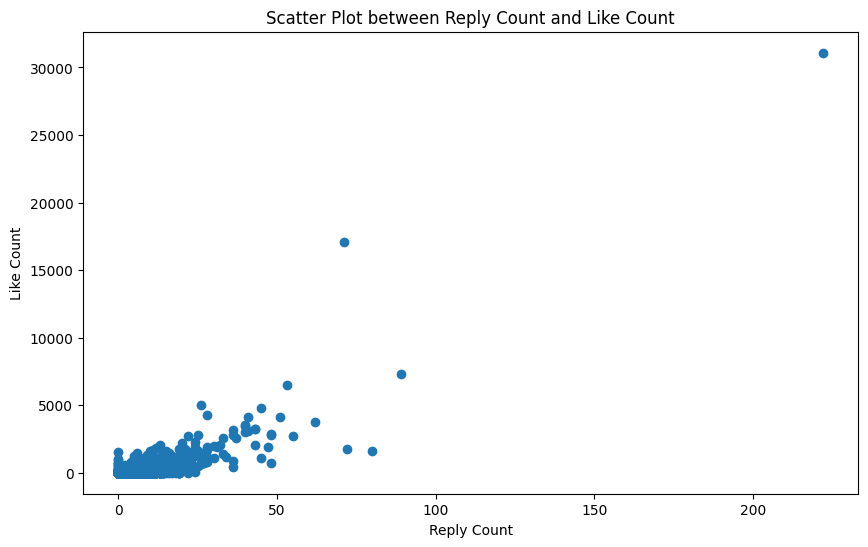

In [7]:
import statsmodels.api as sm
comments_df = comments_df.dropna(subset=['likeCount', 'totalReplyCount'])

X = comments_df['totalReplyCount']
Y = comments_df['likeCount']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(comments_df['totalReplyCount'], comments_df['likeCount'])
plt.title('Scatter Plot between Reply Count and Like Count')
plt.xlabel('Reply Count')
plt.ylabel('Like Count')
plt.show()


In [8]:
comments_df['sentiment'] = result_df['preprocessed_text'].apply(classify_sentiment_custom)
positive_replies = comments_df[comments_df['sentiment'] == 'positive']['totalReplyCount'].sum()
negative_replies = comments_df[comments_df['sentiment'] == 'negative']['totalReplyCount'].sum()

positive_likes = comments_df[comments_df['sentiment'] == 'positive']['likeCount'].sum()
negative_likes = comments_df[comments_df['sentiment'] == 'negative']['likeCount'].sum()

print(f"Total replies on positive comments: {positive_replies}")
print(f"Total replies on negative comments: {negative_replies}")

print(f"Total likes on positive comments: {positive_likes}")
print(f"Total likes on negative comments: {negative_likes}")

Total replies on positive comments: 11697
Total replies on negative comments: 4905
Total likes on positive comments: 223869
Total likes on negative comments: 45281


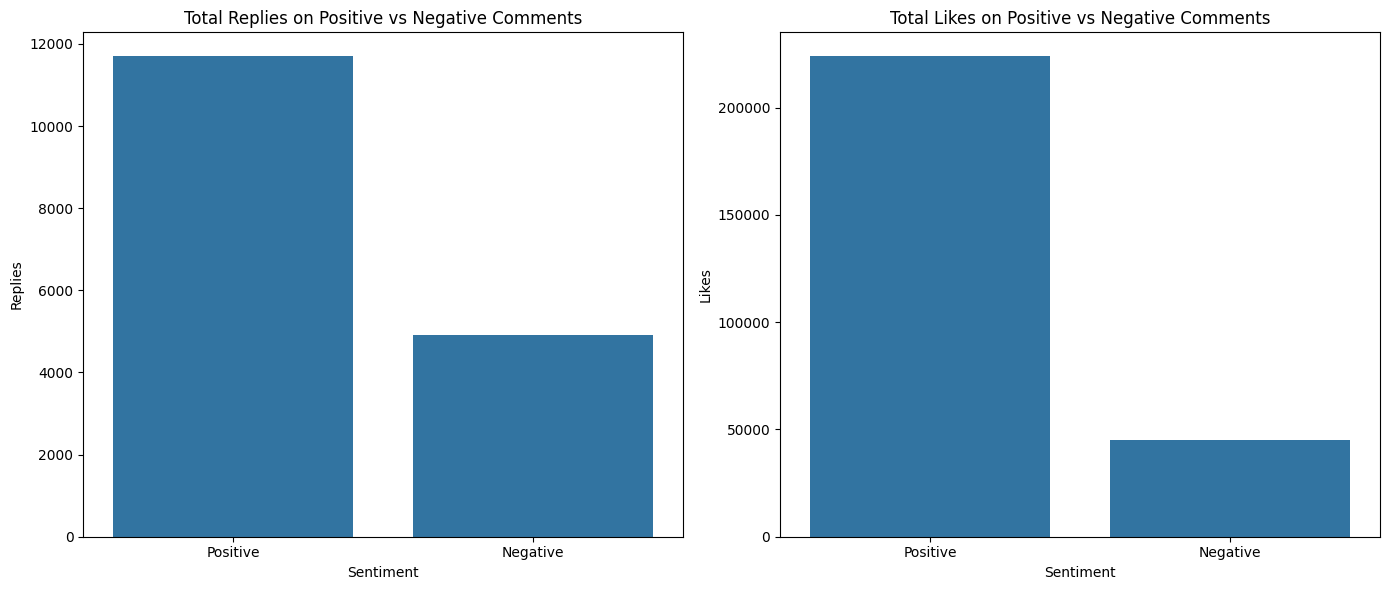

In [9]:
summary_df = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative'],
    'Replies': [positive_replies, negative_replies],
    'Likes': [positive_likes, negative_likes]
})

# summary
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Sentiment', y='Replies', data=summary_df, ax=ax[0])
ax[0].set_title('Total Replies on Positive vs Negative Comments')

sns.barplot(x='Sentiment', y='Likes', data=summary_df, ax=ax[1])
ax[1].set_title('Total Likes on Positive vs Negative Comments')

plt.tight_layout()
plt.show()


# LSTM + CNN

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_7             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
394/394 - 16s - 41ms/step - accuracy: 0.8404 - loss: 0.3583 - val_accuracy: 0.9249 - val_loss: 0.1925
Epoch 2/10
394/394 - 17s - 44ms/step - accuracy: 0.9415 - loss: 0.1470 - val_accuracy: 0.9353 - val_loss: 0.1557
Epoch 3/10
394/394 - 19s - 47ms/step - accuracy: 0.9610 - loss: 0.0949 - val_accuracy: 0.9406 - val_loss: 0.1503
Epoch 4/10
394/394 - 20s - 51ms/step - accuracy: 0.9753 - loss: 0.0649 - val_accuracy: 0.9439 - val_loss: 0.1559
Epoch 5/10
394/394 - 24s - 61ms/step - accuracy: 0.9827 - loss: 0.0484 - val_accuracy: 0.9471 - val_loss: 0.1708
Test Accuracy: 94.06%
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 94.06%
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      1743
    Positive       0.95      0.97      0.96      4552

    accuracy                           0.94      6295
   macro avg       0.93      0.92      0.93      6295
weighted avg       0.94      0.94      0.94      6295



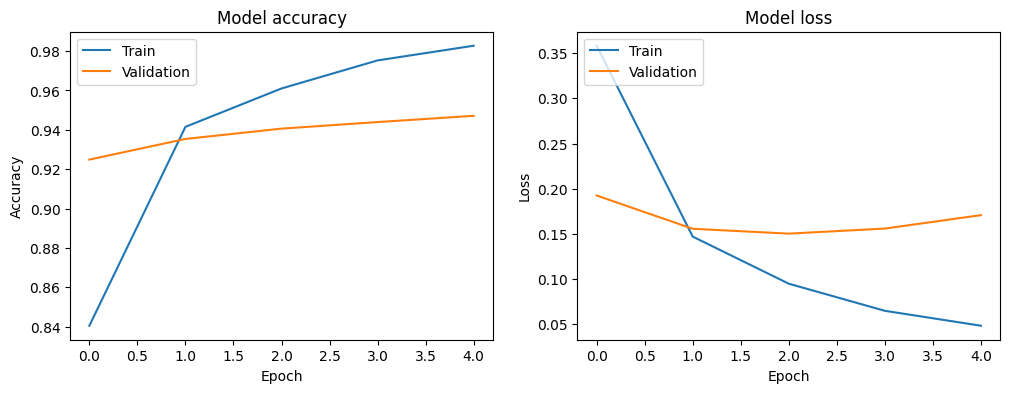

In [24]:
import pandas as pd
import os
import numpy as np
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


comments_df['textDisplay'] = comments_df['textDisplay'].fillna("").astype(str)

comments_df['preprocessed_text'] = comments_df['textDisplay'].apply(preprocess_text)
comments_df['sentiment'] = comments_df['preprocessed_text'].apply(classify_sentiment_custom)

comments_df = comments_df[comments_df['sentiment'] != 'neutral']  # Remove neutral for binary classification
comments_df['label'] = comments_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


X = comments_df['preprocessed_text']
y = comments_df['label']


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM + CNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=2)
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {score[1] * 100:.2f}%")

model_pred = model.predict(X_test)
model_pred = np.round(model_pred.flatten())
accuracy = accuracy_score(y_test, model_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))
print(classification_report(y_test, model_pred, target_names=['Negative', 'Positive']))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('training_history.png')


# Confusion Matrix for LSTM + CNN

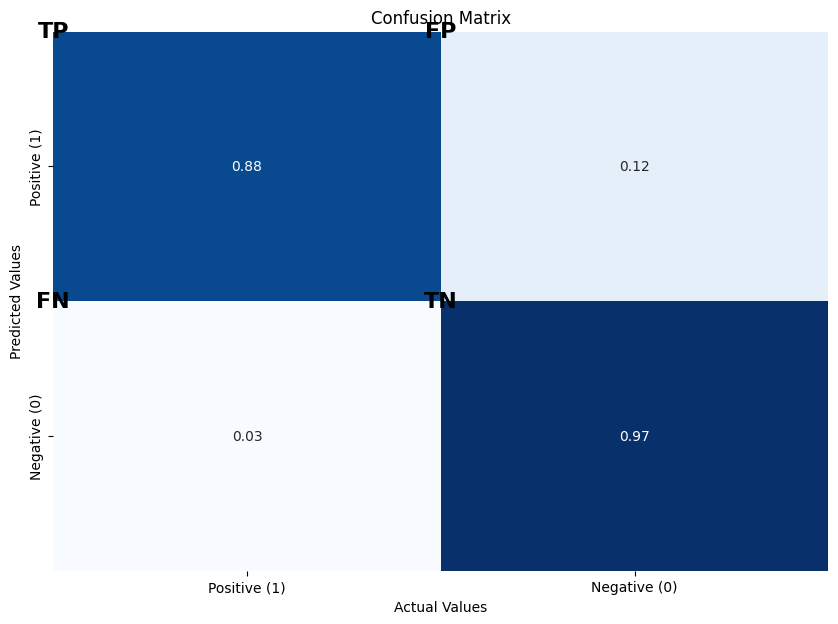

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, model_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Positive (1)', 'Negative (0)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Positive (1)', 'Negative (0)'])
labels = np.array([['TP', 'FP'], ['FN', 'TN']])
for i in range(2):
    for j in range(2):
        plt.text(j , i , labels[i, j],
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=16, weight='bold')

plt.show()


# LR

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = comments_df['preprocessed_text']
y = comments_df['label']


tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Test Accuracy: 89.88%
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80      1743
    Positive       0.90      0.96      0.93      4552

    accuracy                           0.90      6295
   macro avg       0.89      0.85      0.87      6295
weighted avg       0.90      0.90      0.90      6295

